Stage 5. Feature Engineering

🙋 Feature Engineering이 무엇인가요?

Feature Engineering(특성 공학)은 원본 데이터의 특성을 추출하거나
변형하여 모델의 성능을 향상시키는 과정을 말합니다.
이를 통해 예측 또는 분류와 같은 작업을 수행할 때 더 나은 결과를 얻을 수 있도록 도와줍니다.

< 스테이지 2. 데이터 확인 > 기억 나시나요? 스테이지 2에서 저희는 간단하게 데이터프레임을 살펴보면서 결측치 처리와 음수인 날짜 데이터를 1년을 기준으로 바꿔주는 작업을 했었습니다. 이전 작업들이 바로 Feature Engineering의 일종입니다!✨ 이번 스테이지에서는 좀 더 심도 있는 Feature Engineering을 학습해보겠습니다~



In [4]:
# pandas


from google.colab import files
uploaded= files.upload()

import io
import pandas as pd

# 데이터 불러오기
df = pd.read_csv(io.StringIO(uploaded['sample_submission.csv'].decode('utf-8')))

Saving sample_submission.csv to sample_submission.csv


In [6]:
from google.colab import files
uploaded= files.upload()
import io
import pandas as pd

df = pd.read_csv(io.StringIO(uploaded['train.csv'].decode('utf-8')))

Saving train.csv to train.csv


In [7]:
from google.colab import files
uploaded= files.upload()
import io
import pandas as pd


df = pd.read_csv(io.StringIO(uploaded['test.csv'].decode('utf-8')))

Saving test.csv to test.csv


In [11]:
# train 데이터를 확인합니다

submission = pd.read_csv('/content/sample_submission.csv')
test = pd.read_csv('/content/test.csv')
train = pd.read_csv('/content/train.csv')

train.tail()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
26452,26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,1,0,0,0,Core staff,4.0,-2.0,1.0
26453,26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,1,0,0,0,NaN,2.0,-47.0,2.0
26454,26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,0,0,0,Core staff,2.0,-25.0,2.0
26455,26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,1,0,0,0,Laborers,1.0,-59.0,2.0
26456,26456,F,N,N,0,81000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-19569,-1013,1,0,0,0,Security staff,2.0,-9.0,2.0


In [12]:
#Step 1. 불필요한 변수 제거

len(train)


26457

In [13]:
len(train['index'].value_counts())

26457

In [14]:
train['FLAG_MOBIL'].value_counts()

,count
FLAG_MOBIL,
1,26457


In [15]:
train = train.drop(columns=["index", "FLAG_MOBIL"])
test = test.drop(columns=["index", "FLAG_MOBIL"])

In [16]:
#Step 2. 치우쳐진 데이터 제거하기
#우선 시각화를 위한 라이브러리 가져오기

import matplotlib.pyplot as plt
import seaborn as sns

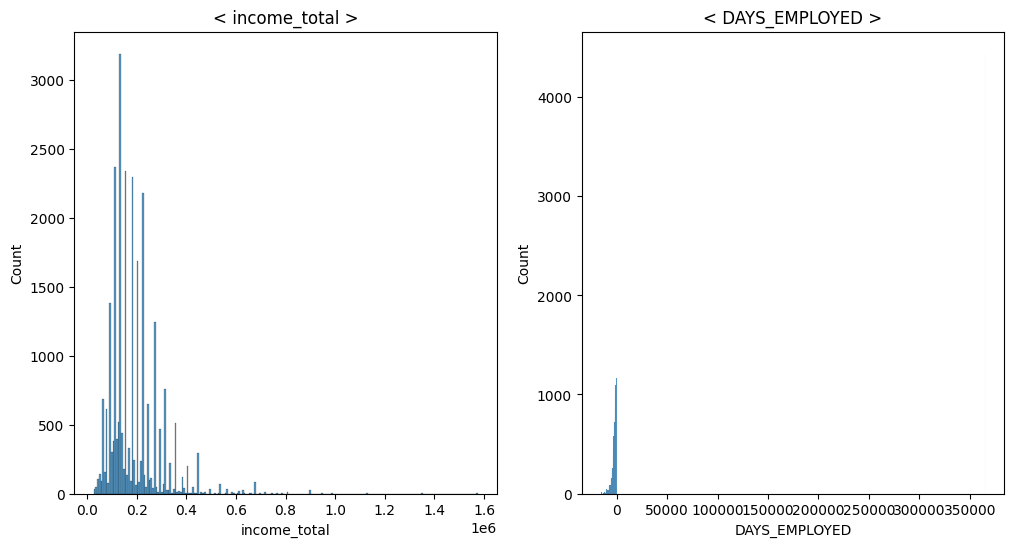

In [17]:
# income_total, DAYS_EMPLOYED 변수의 히스토그램을 그립니다

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes = axes.flatten()
columns = ["income_total", "DAYS_EMPLOYED"]

for i, col in enumerate(columns):
  sns.histplot(data=train, x=col, ax=axes[i])
  axes[i].set_title(f"< {col} >")
plt.show()

In [18]:
# 두 그래프 모두 왼쪽으로 치우쳐진 것을 확인할 수 있었따
#분포도의 왜곡을 확인하기 위해서는 왜도와 첨도를 알아야함

from scipy.stats import skew, kurtosis

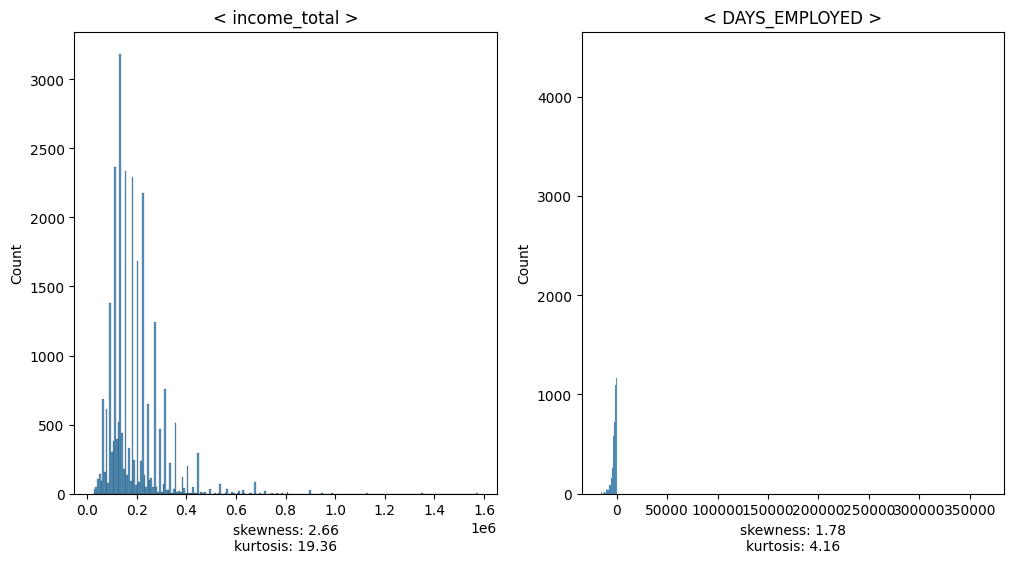

In [19]:
# income_total, DAYS_EMPLOYED 변수의 히스토그램

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes = axes.flatten()
columns = ["income_total", "DAYS_EMPLOYED"]

for i, col in enumerate(columns):
  sns.histplot(data=train, x=col, ax=axes[i])
  axes[i].set_title(f"< {col} >")

  skewness = skew(train[col])
  kurto = kurtosis(train[col], fisher=False)
  axes[i].set_xlabel(f"skewness: {round(skewness, 2)}\nkurtosis: {round(kurto, 2)}")
plt.show()

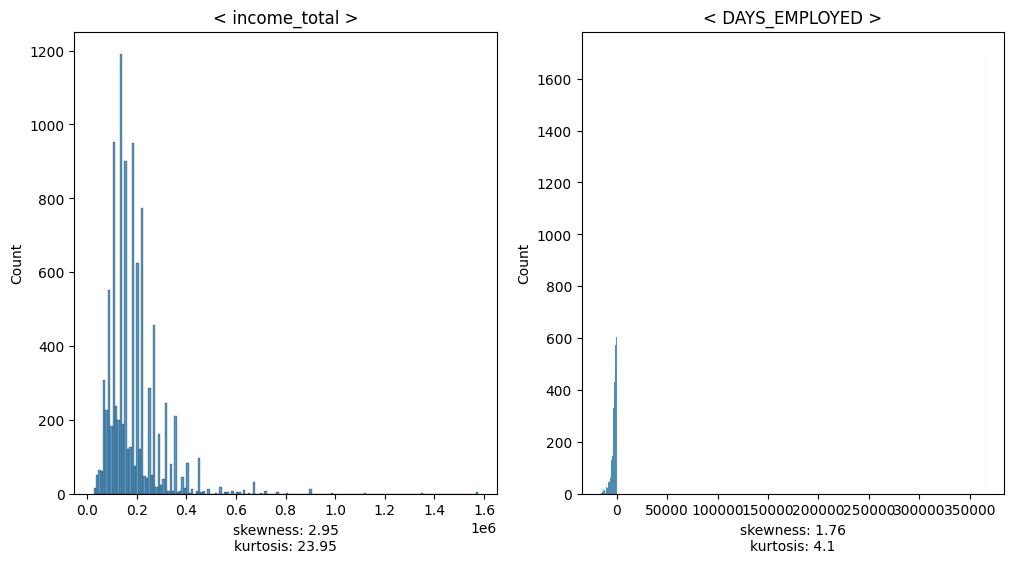

In [20]:
# income_total, DAYS_EMPLOYED 변수의 히스토그램

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes = axes.flatten()
columns = ["income_total", "DAYS_EMPLOYED"]

for i, col in enumerate(columns):
  sns.histplot(data=test, x=col, ax=axes[i])
  axes[i].set_title(f"< {col} >")

  skewness = skew(test[col])
  kurto = kurtosis(test[col], fisher=False)
  axes[i].set_xlabel(f"skewness: {round(skewness, 2)}\nkurtosis: {round(kurto, 2)}")
plt.show()

In [21]:
#그렇다면 Skewed Data는 어떻게 처리해야 할까요?
#바로 로그 변환(Log Transformation)을 통해 그래프를 정규화시켜줄 수 있습니다!
#데이터의 로그 변환 결과를 통해 정규분포에 가깝게 만들어줄 수 있습니다.
#로그 변환을 위해 Numpy 패키지의 np.log() 함수를 사용해주도록 하겠습니다.

import numpy as np

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


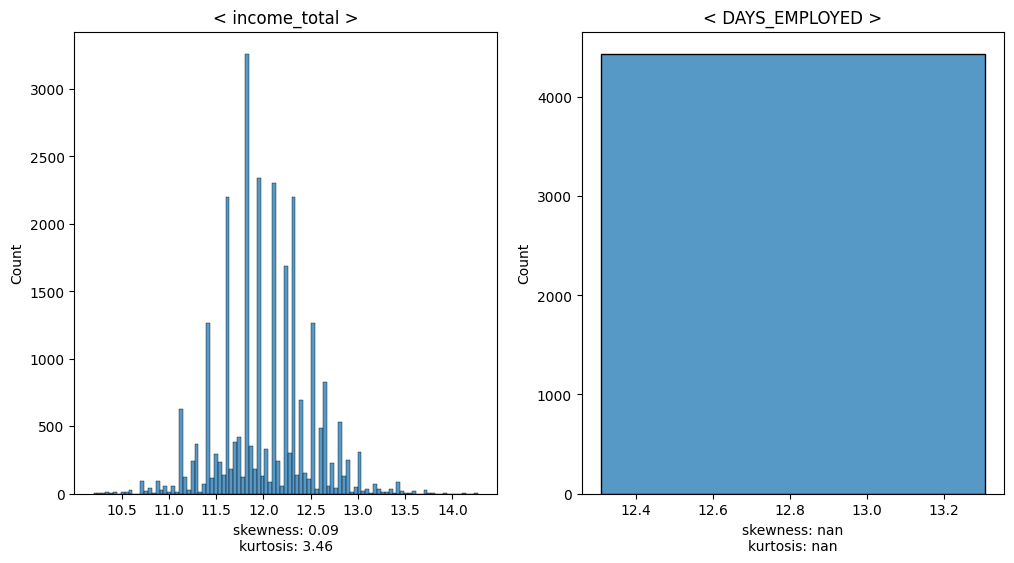

In [22]:
# income_total, DAYS_EMPLOYED 변수의 히스토그램을 그립니다

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes = axes.flatten()
columns = ["income_total", "DAYS_EMPLOYED"]

for i, col in enumerate(columns):
  if i == 1:
    data = np.log(train[col] + 1)
  else:
    data = np.log(train[col])
  sns.histplot(data=data, ax=axes[i])
  axes[i].set_title(f"< {col} >")

  skewness = skew(data)
  kurto = kurtosis(data, fisher=False)
  axes[i].set_xlabel(f"skewness: {round(skewness, 2)}\nkurtosis: {round(kurto, 2)}")
plt.show()
#Days employed 그래프 저만 이상한가요? 왜 이러지

In [23]:
# train 데이터의 income_total, DAYS_EMPLOYED 변수에 로그 변환을 적용합니다

train["income_total"] = np.log(train["income_total"])
train["DAYS_EMPLOYED"] = np.log(train["DAYS_EMPLOYED"] + 1)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [24]:
# test 데이터의 income_total, DAYS_EMPLOYED 변수에 로그 변환을 적용합니다

test["income_total"] = np.log(test["income_total"])
test["DAYS_EMPLOYED"] = np.log(test["DAYS_EMPLOYED"] + 1)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [25]:
#그러나, child_num이 5 초과인 변수에서 뚜렷한 패턴이 존재했기 때문에
#카테고리형 변수를 추가로 만들어주도록 하겠습니다.

#새로운 변수의 이름은 child_num_over_five라고 지어주도록 하겠습니다!
#이 변수는 자식 수에 따라 True, False 값을 가지는 변수

# 변수 child_num_over_five를 추가합니다

train["child_num_over_five"] = train["child_num"] > 5

In [26]:
# test 데이터에 변수 child_num_over_five를 추가합니다
test["child_num_over_five"] = test["child_num"] > 5

In [27]:
# train 데이터의 중복된 행을 확인합니다
train.drop(columns="begin_month").duplicated().sum()

14358

In [28]:
#train 데이터에서 무려 14362개의 행이 중복된 것을 확인 할 수 있었음. test 데이터에서도 확인하기
test.drop(columns="begin_month").duplicated().sum()

4415

In [29]:
#Test 데이터에서도 4415개의 행이 중복됨을 확인함

#중복된 데이터를 제거해주기는 하지 않고

#신용카드를 여러 번 발급받는 사람들에게서 패턴을 학습할 수 있도록 새로운 변수를 추가해줄게요!
#신용카드 중복 발급 수를 나타내는 duplicated_num 변수를 추가해주겠습니다.

# 신용카드 중복 발급 수를 나타내는 duplicated_num 변수를 추가합니다

# 'begin_month' 열을 제거한 데이터프레임 생성
train_drop = train.drop(columns="begin_month")

# 각 행의 중복 횟수를 계산하여 'duplicated_num' 변수에 저장
duplicated_num = train_drop.groupby(train_drop.columns.tolist()).size().reset_index(name='duplicated_num')

# 원래 데이터프레임에 'duplicated_num' 변수 추가
train = train.merge(duplicated_num, on=train_drop.columns.tolist(), how='left')

In [30]:
# train 데이터를 확인합니다
train.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,child_num_over_five,duplicated_num
0,F,N,N,0,12.218495,Commercial associate,Higher education,Married,Municipal apartment,-13899,NaN,0,0,0,NaN,2.0,-6.0,1.0,False,NaN
1,F,N,Y,1,12.419166,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,NaN,0,0,1,Laborers,3.0,-5.0,1.0,False,NaN
2,M,Y,Y,0,13.017003,Working,Higher education,Married,House / apartment,-19087,NaN,0,1,0,Managers,2.0,-22.0,2.0,False,NaN
3,F,N,Y,0,12.218495,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,NaN,0,1,0,Sales staff,2.0,-37.0,0.0,False,NaN
4,F,Y,Y,0,11.967181,State servant,Higher education,Married,House / apartment,-15037,NaN,0,0,0,Managers,2.0,-26.0,2.0,False,NaN


In [31]:
# 신용카드 중복 발급 수를 나타내는 duplicated_num 변수를 추가합니다

# 'begin_month' 열을 제거한 데이터프레임 생성
test_drop = test.drop(columns="begin_month")

# 각 행의 중복 횟수를 계산하여 'duplicated_num' 변수에 저장
duplicated_num = test_drop.groupby(test_drop.columns.tolist()).size().reset_index(name='duplicated_num')

# 원래 데이터프레임에 'duplicated_num' 변수 추가
test = test.merge(duplicated_num, on=test_drop.columns.tolist(), how='left')

In [32]:
#Step 5. 파생변수 만들어주기. before_employed 변수 만들기

# before_employed 변수 추가
train['before_employed'] =  train['DAYS_BIRTH']-  train['DAYS_EMPLOYED']
test["before_employed"] = test['DAYS_BIRTH']-  test['DAYS_EMPLOYED']

In [33]:
# tabulate 모듈을 설치합니다
# %pip install tabulate

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               26457 non-null  object 
 1   car                  26457 non-null  object 
 2   reality              26457 non-null  object 
 3   child_num            26457 non-null  int64  
 4   income_total         26457 non-null  float64
 5   income_type          26457 non-null  object 
 6   edu_type             26457 non-null  object 
 7   family_type          26457 non-null  object 
 8   house_type           26457 non-null  object 
 9   DAYS_BIRTH           26457 non-null  int64  
 10  DAYS_EMPLOYED        4438 non-null   float64
 11  work_phone           26457 non-null  int64  
 12  phone                26457 non-null  int64  
 13  email                26457 non-null  int64  
 14  occyp_type           18286 non-null  object 
 15  family_size          26457 non-null 

In [36]:
# house_type에 따른 신용도 비율을 확인합니다

from tabulate import tabulate

output_table = []

types = train["house_type"].value_counts().index

dfs = [train[train["house_type"] == types[i]] for i in range(len(types))]

for i, df in enumerate(dfs):
  output_table.append([types[i],
                      f'{round((len(df) / len(train)) * 100, 2)}%',
                      round(df["credit"].value_counts(normalize=True) * 100, 2).astype("str") + "%"])

print(tabulate(output_table, headers=['House Type', 'Proportion', 'Credit Distribution'], tablefmt='grid'))

+---------------------+--------------+---------------------------------+
| House Type          | Proportion   | Credit Distribution             |
+=====================+==============+=================================+
| House / apartment   | 89.4%        | credit                          |
|                     |              | 2.0    64.31%                   |
|                     |              | 1.0    23.54%                   |
|                     |              | 0.0    12.15%                   |
|                     |              | Name: proportion, dtype: object |
+---------------------+--------------+---------------------------------+
| With parents        | 4.75%        | credit                          |
|                     |              | 2.0    63.09%                   |
|                     |              | 1.0     24.9%                   |
|                     |              | 0.0    12.01%                   |
|                     |              | Name: propor

In [37]:
#Rented Apartment 주거 타입이 나머지와 두드러진 분포의 차이를 보임을 확인할 수 있었따
#집의 소유 여부 알려주는 house_owner 변수 추가해주기

train["house_owner"] = (train["house_type"] != "Rented apratment")
test["house_owner"] = (test["house_type"] != "Rented apratment")

In [38]:
#Step 6. 카테고리형 변수 변환

from sklearn.preprocessing import LabelEncoder

In [39]:
# LabelEncoder로 object 타입 변수들을 수치형 데이터로 변환해줍니다

cols = train.select_dtypes(include=['object'])
le = LabelEncoder()

for col in cols:
    train[col] = le.fit_transform(train[col])

In [40]:


# test 데이터의 object 타입 변수들을 LabelEncoder()로 변환합니다
cols = test.select_dtypes(include=['object'])
le = LabelEncoder()

for col in cols:
    test[col] = le.fit_transform(test[col])

In [45]:
#Step 7. 전처리된 데이터 저장하기
train.to_csv('/content/sample_submission.csv', index=False)
test.to_csv('test.csv', index=False)

In [46]:
#Step 6. 하이파라미터 튜닝 & 최종 모델링

#1. 모델링- 의사결정나무

# 데이터 분석에 필요한 라이브러리들을 불러옵니다

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [47]:
# Feature Engineering이 끝난 데이터를 불러옵니다

train=pd.read_csv('/content/sample_submission.csv')
test=pd.read_csv('test.csv')
submission=pd.read_csv('/content/sample_submission.csv')

In [48]:
# target의 분포를 살펴봅니다
print(train['credit'].value_counts())

credit
2.0    16968
1.0     6267
0.0     3222
Name: count, dtype: int64


In [49]:
#train 데이터를 기반으로 학습데이터와 검증데이터의 비율을 8:2로 분리하여
#train과 validation으로 분리합니다.
#이때 stratify=y를 통해 데이터가 타깃 클래스의 비율을 반영하도록 설정합니다.

X = train.drop(columns='credit')
y = train['credit']

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y,
                                                      test_size= 0.2, random_state=42)

#사이킷런의 DecisionTreeClassifier로 모델 학습
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [50]:
# 각 클래스의 비율을 퍼센트로 계산
y_train_percent = y_train.value_counts(normalize=True) * 100
y_valid_percent = y_valid.value_counts(normalize=True) * 100

# 결과 출력
print(y_train_percent)
print(y_valid_percent)

credit
2.0    64.134184
1.0    23.685330
0.0    12.180487
Name: proportion, dtype: float64
credit
2.0    64.134543
1.0    23.696145
0.0    12.169312
Name: proportion, dtype: float64


< 주요 average 옵션 >
average: 다중 클래스 분류에서 사용되는 평균 방법을 지정하는 매개변수입니다.

None: 클래스별로 평가 지표를 계산하고 개별 클래스마다 값을 반환합니다.
이 경우 클래스마다 리콜, 정밀도, F1 스코어 등을 계산한 값을 반환합니다.

'micro': 모든 클래스의 TP, FP, FN을 모두 더하여 전체 데이터에 대한 평가 지표를 계산합니다.
전체 데이터에 대한 하나의 평가 지표 값을 얻을 수 있습니다.

'macro': 각 클래스마다 평가 지표를 계산한 뒤 이들 값을 평균하여 전체 평가 지표 값을 계산합니다. 클래스의 개수에 상관없이 각 클래스의 영향력을 동일하게 취급합니다.

'weighted': 각 클래스마다 평가 지표를 계산한 뒤, 클래스의 샘플 수를 고려하여
가중 평균을 계산하여 전체 평가 지표 값을 계산합니다. 클래스별 샘플 수가 다른 경우 유용합니다.

'samples': 다중 레이블 분류에서 사용되며, 각 샘플에 대해 평가 지표를 계산한 뒤
이들 값을 평균하여 전체 평가 지표 값을 계산합니다.


In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, log_loss

pred_1 = dt.predict(X_valid)
valid_cm_1 = confusion_matrix(y_valid, pred_1)
valid_acc_1 = accuracy_score(y_valid, pred_1)
valid_recall_1 = recall_score(y_valid, pred_1, average="weighted")
valid_precision_1 = precision_score(y_valid, pred_1, average="weighted")
valid_f1_1 = f1_score(y_valid, pred_1, average="weighted")

print("Confusion Matrix(혼동행렬): \n",valid_cm_1)
print('\n')
print("Accuracy(정확도): ", round(valid_acc_1*100, 2))
print("Recall(재현율): ", round(valid_recall_1*100, 2))
print("Precision(정밀도): ", round(valid_precision_1*100, 2))
print("F1 Score(정밀도, 리콜의 조화평균): ", round(valid_f1_1, 4))

Confusion Matrix(혼동행렬): 
 [[   6   84  554]
 [   9  287  958]
 [  12   26 3356]]


Accuracy(정확도):  68.95
Recall(재현율):  68.95
Precision(정밀도):  64.05
F1 Score(정밀도, 리콜의 조화평균):  0.6056


In [52]:
from sklearn.metrics import classification_report

# y_valid는 실제 레이블을, pred_1은 모델의 예측 결과
report = classification_report(y_valid, pred_1)
print(report)

#classification_report()는 분류 모델의 성능을 종합적으로 평가하기 위한 함수로,scikit-learn 패키지에서 제공되는 기능 중 하나입니다.이 함수를 사용하면 정확도, 리콜, 정밀도, f1-스코어 등 다양한 평가 지표를 한 번에 출력할 수 있습니다.

              precision    recall  f1-score   support

         0.0       0.22      0.01      0.02       644
         1.0       0.72      0.23      0.35      1254
         2.0       0.69      0.99      0.81      3394

    accuracy                           0.69      5292
   macro avg       0.54      0.41      0.39      5292
weighted avg       0.64      0.69      0.61      5292



In [53]:
#feature_importances_ 속성은 모델을 학습시켰을 때,모델에서 변수들의 중요도를 수치화시킨 속성입니다.

feature_importances = pd.Series(dt.feature_importances_,index=X_valid.columns).sort_values(ascending=False)
feature_importance = feature_importances.head(20)
print(feature_importance)

reality                0.000804
occyp_type             0.000537
DAYS_EMPLOYED          0.000000
duplicated_num         0.000000
house_owner            0.000000
gender                      NaN
car                         NaN
child_num                   NaN
income_total                NaN
income_type                 NaN
edu_type                    NaN
family_type                 NaN
house_type                  NaN
DAYS_BIRTH                  NaN
work_phone                  NaN
phone                       NaN
email                       NaN
family_size                 NaN
begin_month                 NaN
child_num_over_five         NaN
dtype: float64


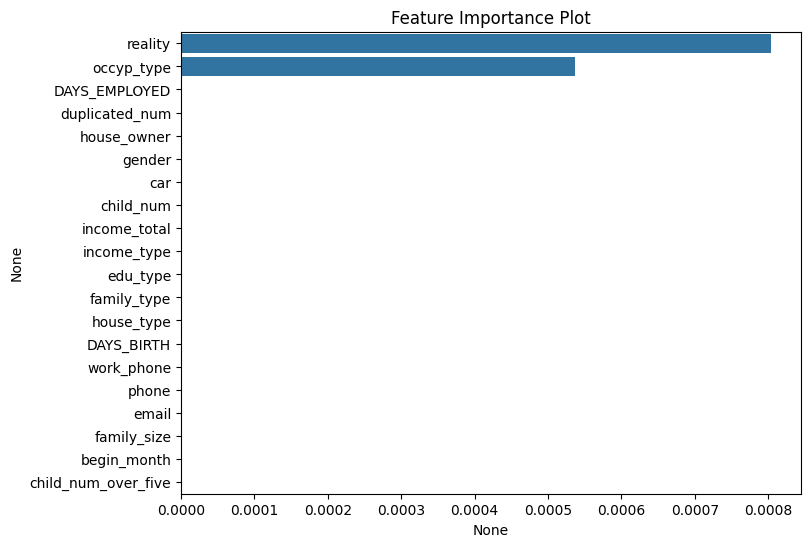

In [54]:
%matplotlib inline

plt.figure(figsize=(8,6))
plt.title('Feature Importance Plot')
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.show()

#라이브러리로 시각화하기
#ㅠㅠ 아니 뭐가 문제지 준홍님껀 잘 나왔는데 제껀 이상해요
#일단 의사결정나무 그래프까지만 올리고 왜 이러는지 원인 파악 후 더 올릴게요